In [ ]:
##########################################
## Made by : HERO Kwon
## Title : TER
## Version : v0
## Date : 2018.05.29.
## Description : TER-RM Algorithm
##########################################


# Main

# packages

import numpy as np
import pandas as pd
import scipy as sp
import os
import re
import imageio
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import confusion_matrix
import time

from sklearn.datasets import load_iris
 
data = load_iris()
data_v = data['data']
data_l = data['target']

data_train = np.array([]).reshape(0,4)
data_test = np.array([]).reshape(0,4)
label_train = np.array([])
label_test = np.array([])

for target in list(set(data['target'])):
    v_train, v_test = train_test_split(data_v[data_l==target],test_size = 0.5)
    l_train = np.full(shape=len(v_train),fill_value=target)
    l_test = np.full(shape=len(v_test),fill_value=target)
    data_train = np.concatenate((data_train,v_train))
    data_test = np.concatenate((data_test,v_test))
    label_train = np.concatenate((label_train,l_train))
    label_test = np.concatenate((label_test,l_test))

## TER Algorithm
# Basis : RM2
def RMmodel(order,X):
    m,l = X.shape
    
    M1 = []
    M2 = []
    M3 = []
    MM1 = []
    MM3 = []

    Msum = np.sum(X,axis=1)

    for i in range(order):
        for k in range(l):
            M1.append(X[:,k]**(i+1))
            if (i>0):
                M3.append(X[:,k]*Msum**(i)) 
        M2.append(Msum**(i+1))
        MM1.append(M1)
        if (i>0):
            MM3.append(M3)

    MM1 = np.array(MM1).T
    MM1 = MM1.reshape((m,-1,1)).squeeze(axis=2)
    M2 = np.array(M2).T
    if (len(MM3)):
        MM3 = np.array(MM3).T
        MM3 = MM3.reshape((m,-1,1)).squeeze(axis=2)
        P = np.concatenate((np.ones((m,1)),MM1,M2,MM3),axis=1)
    else : P = np.concatenate((np.ones((m,1)),MM1,M2),axis=1)

    return(P)

def TERmodel(rank,r,n,X,Y):
    alpha = []
    
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=X[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=X[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        ak = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p)).dot\
        ((1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p))

        alpha.append(ak)
    alpha = np.array(alpha).T
    return(alpha)

rank = 6

alpha = TERmodel(rank,0.5,0.5,data_train,label_train)
P_t = RMmodel(rank,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)
plt.plot(yt1)


In [ ]:
plt.plot(yt1)

In [ ]:
yt.shape

In [ ]:
alpha.shape

In [ ]:
def TERmodel(rank,r,n,X,Y):
    alpha = []
    
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=X[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=X[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        ak = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p)).dot\
        ((1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p))

        alpha.append(ak)
    alpha = np.array(alpha).T
    return(alpha)

rank = 6

In [ ]:
alpha.shape

In [ ]:
def TERmodel(rank,r,n,X,Y):
    alpha = []
    
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=X[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=X[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        ak = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p)).dot\
        ((1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p))

        alpha.append(ak)
    alpha = np.array(alpha).T
    return(alpha)

In [ ]:
rank = 6

alpha = TERmodel(rank,0.5,0.5,data_train,label_train)

In [ ]:
alpha.shape

In [ ]:
##########################################
## Made by : HERO Kwon
## Title : TER
## Version : v0
## Date : 2018.05.29.
## Description : TER-RM Algorithm
##########################################


# Main

# packages

import numpy as np
import pandas as pd
import scipy as sp
import os
import re
import imageio
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import confusion_matrix
import time

from sklearn.datasets import load_iris
 
data = load_iris()
data_v = data['data']
data_l = data['target']

data_train = np.array([]).reshape(0,4)
data_test = np.array([]).reshape(0,4)
label_train = np.array([])
label_test = np.array([])

for target in list(set(data['target'])):
    v_train, v_test = train_test_split(data_v[data_l==target],test_size = 0.5)
    l_train = np.full(shape=len(v_train),fill_value=target)
    l_test = np.full(shape=len(v_test),fill_value=target)
    data_train = np.concatenate((data_train,v_train))
    data_test = np.concatenate((data_test,v_test))
    label_train = np.concatenate((label_train,l_train))
    label_test = np.concatenate((label_test,l_test))

## TER Algorithm
# Basis : RM2
def RMmodel(order,X):
    m,l = X.shape
    
    M1 = []
    M2 = []
    M3 = []
    MM1 = []
    MM3 = []

    Msum = np.sum(X,axis=1)

    for i in range(order):
        for k in range(l):
            M1.append(X[:,k]**(i+1))
            if (i>0):
                M3.append(X[:,k]*Msum**(i)) 
        M2.append(Msum**(i+1))
        MM1.append(M1)
        if (i>0):
            MM3.append(M3)

    MM1 = np.array(MM1).T
    MM1 = MM1.reshape((m,-1,1)).squeeze(axis=2)
    M2 = np.array(M2).T
    if (len(MM3)):
        MM3 = np.array(MM3).T
        MM3 = MM3.reshape((m,-1,1)).squeeze(axis=2)
        P = np.concatenate((np.ones((m,1)),MM1,M2,MM3),axis=1)
    else : P = np.concatenate((np.ones((m,1)),MM1,M2),axis=1)

    return(P)


In [ ]:

def TERmodel(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=X[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=X[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        ak = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p)).dot\
        ((1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p))

        alpha.append(ak)
    return(np.array(alpha).T)

In [ ]:
rank = 6

alpha = TERmodel(rank,0.5,0.5,data_train,label_train)

In [ ]:
alpha.shape

In [ ]:
set(label_train)

In [1]:
##########################################
## Made by : HERO Kwon
## Title : TER
## Version : v0
## Date : 2018.05.29.
## Description : TER-RM Algorithm
##########################################


# Main

# packages

import numpy as np
import pandas as pd
import scipy as sp
import os
import re
import imageio
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import confusion_matrix
import time

from sklearn.datasets import load_iris
 
data = load_iris()
data_v = data['data']
data_l = data['target']

data_train = np.array([]).reshape(0,4)
data_test = np.array([]).reshape(0,4)
label_train = np.array([])
label_test = np.array([])

for target in list(set(data['target'])):
    v_train, v_test = train_test_split(data_v[data_l==target],test_size = 0.5)
    l_train = np.full(shape=len(v_train),fill_value=target)
    l_test = np.full(shape=len(v_test),fill_value=target)
    data_train = np.concatenate((data_train,v_train))
    data_test = np.concatenate((data_test,v_test))
    label_train = np.concatenate((label_train,l_train))
    label_test = np.concatenate((label_test,l_test))

## TER Algorithm
# Basis : RM2
def RMmodel(order,X):
    m,l = X.shape
    
    M1 = []
    M2 = []
    M3 = []
    MM1 = []
    MM3 = []

    Msum = np.sum(X,axis=1)

    for i in range(order):
        for k in range(l):
            M1.append(X[:,k]**(i+1))
            if (i>0):
                M3.append(X[:,k]*Msum**(i)) 
        M2.append(Msum**(i+1))
        MM1.append(M1)
        if (i>0):
            MM3.append(M3)

    MM1 = np.array(MM1).T
    MM1 = MM1.reshape((m,-1,1)).squeeze(axis=2)
    M2 = np.array(M2).T
    if (len(MM3)):
        MM3 = np.array(MM3).T
        MM3 = MM3.reshape((m,-1,1)).squeeze(axis=2)
        P = np.concatenate((np.ones((m,1)),MM1,M2,MM3),axis=1)
    else : P = np.concatenate((np.ones((m,1)),MM1,M2),axis=1)

    return(P)

def TERmodel(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=X[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=X[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        ak = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p)).dot((1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p))

        alpha.append(ak)
    return(np.array(alpha).T)

alpha = TERmodel(6,0.5,0.5,data_train,label_train)

P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)
plt.plot(yt1)

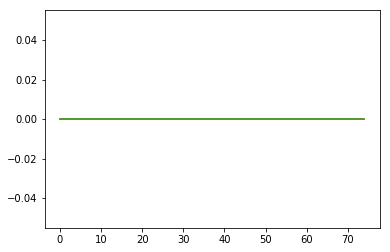

In [2]:
plt.plot(yt1)

In [3]:
alpha = []

In [4]:
k=6

In [5]:
X = data_train

In [6]:
Y=label_train

In [7]:
k = 0.0

In [10]:
        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

In [9]:
rank=6

In [11]:
P_n.shape

(50, 251)

In [12]:
P_p.shape

(25, 251)

In [13]:
        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

In [14]:
mk_n.shape

AttributeError: 'int' object has no attribute 'shape'

In [15]:
mk_n

50

In [17]:
X[Y!=k].shape

(50, 4)

In [21]:
        yk_n = (r-n) * np.ones(shape=X[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=X[Y==k].shape)

In [19]:
r = 0.5

In [20]:
n=0.5

In [22]:
yk_n.shape

(50, 4)

In [26]:
        ak = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p)).dot((1/mk_n)*(P_n.T).dot\
        (yk_n) + (1/mk_p)*(P_p.T).dot(yk_p))

NameError: name 'I' is not defined

In [25]:
b = 0.0001

In [27]:
I = np.eye(P_n.shape[1])

In [30]:
        ak = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p)).dot((1/mk_n)*(P_n.T).dot\
        (yk_n) + (1/mk_p)*(P_p.T).dot(yk_p))

In [31]:
ak.shape

(251, 4)

In [32]:
ak.shape

(251, 4)

In [33]:
def TERmodel(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=X[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=X[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        ak = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p)).dot\
        ((1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p))

        alpha.append(ak)
    return(np.array(alpha).T)

In [34]:
alpha = TERmodel(6,0.5,0.5,data_train,label_train)

In [35]:
alpha.shape

(4, 251, 3)

In [36]:
P_n.shape

(50, 251)

In [37]:
P_p.shape

(25, 251)

In [38]:
k

0.0

In [39]:
P_n.shape

(50, 251)

In [41]:
mk_n

50

In [42]:
mk_p

25

In [43]:
yk_n.shape

(50, 4)

In [44]:
yk_p.shape

(25, 4)

In [46]:
data_train[label_train != k].shape

(50, 4)

In [47]:
I.shape

(251, 251)

In [48]:
def TERmodel(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=X[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=X[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        ak = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p)).cross\
        ((1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p))

        alpha.append(ak)
    return(np.array(alpha).T)


In [49]:
alpha = TERmodel(6,0.5,0.5,data_train,label_train)

AttributeError: 'numpy.ndarray' object has no attribute 'cross'

In [50]:
def TERmodel(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=X[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=X[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)
       first_eq = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p))
        second_eq = (1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p)
        ak = np.cross(first_eq,second_eq)

        alpha.append(ak)
    return(np.array(alpha).T)

In [51]:
alpha = TERmodel(6,0.5,0.5,data_train,label_train)

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

In [52]:

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=X[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=X[Y==k].shape)
        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        first_eq = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p))
        second_eq = (1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p)
        ak = np.cross(first_eq,second_eq)

        alpha.append(ak)

NameError: name 'first_eq' is not defined

In [54]:
        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=X[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=X[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        first_eq = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p))
        second_eq = (1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p)

In [55]:
first_eq.shape

(251, 251)

In [56]:
second_eq.shape

(251, 4)

In [57]:
ak = np.dot(first_eq,second_eq)

In [58]:
ak.shape

(251, 4)

In [59]:
yk_n.shape

(50, 4)

In [60]:
def TERmodel(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=Y[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=Y[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        first_eq = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p))
        second_eq = (1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p)
        ak = np.dot(first_eq,second_eq)

        alpha.append(ak)
    return(np.array(alpha).T)

In [61]:

alpha = TERmodel(6,0.5,0.5,data_train,label_train)

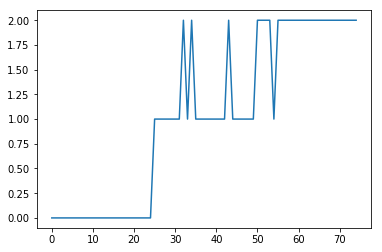

In [62]:
P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)
plt.plot(yt1)

In [63]:
def TERmodel(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=Y[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=Y[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        first_eq = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p))
        second_eq = (1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p)
        ak = np.cross(first_eq,second_eq)

        alpha.append(ak)
    return(np.array(alpha).T)

In [64]:
alpha = TERmodel(6,0.5,0.5,data_train,label_train)

P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)
plt.plot(yt1)

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

In [67]:
np.abs(yt1-label_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [68]:
yt1-label_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])